In [1]:
from dotenv import load_dotenv
import os
load_dotenv()
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")
groq_api_key = os.getenv("GROQ_API_KEY")

In [2]:
from langchain_groq import ChatGroq
model = ChatGroq(model="llama-3.3-70b-versatile", api_key=groq_api_key)
model

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x106443530>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x10b680170>, model_name='llama-3.3-70b-versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [3]:
from typing_extensions import TypedDict
class State(TypedDict):
    topic:str
    characters:str
    setting:str
    premises:str
    story_intro:str

In [5]:
def generate_characters(state:State):
    """ generate character descriptions"""
    msg = model.invoke(f"Create two character name and brief traits for a story about {state['topic']}")
    return {"characters":msg.content}
def generate_setting(state:State):
    """generate story setting"""
    msg = model.invoke(f"Describe a vivid setting for a story about {state['topic']}")
    return {"setting":msg.content}
def generate_premises(state:State):
    """ Generate a story premises """
    msg = model.invoke(f"Write a one-sentence plot premise for a story about {state['setting']}")
def combine_elements(state:State):
    """ Combine Characters, setting, premises"""
    msg = model.invoke(
        f"Write a short story introduction using these elements:\n"
        f"Characters: {state['characters']}\n"
        f"Setting: {state['setting']}\n"
        f"premises:{state['premises']}\n"
    )
    return {"story_intro": msg.content}


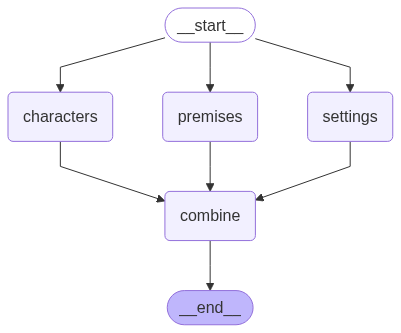

In [6]:
from langgraph.graph import START, END, StateGraph

builder = StateGraph(State)
builder.add_node("characters", generate_characters)
builder.add_node("settings", generate_setting)
builder.add_node("premises", generate_premises)
builder.add_node("combine", combine_elements)

builder.add_edge(START,'characters')
builder.add_edge(START,'settings')
builder.add_edge(START,'premises')
builder.add_edge('characters',"combine")
builder.add_edge('settings',"combine")
builder.add_edge('premises',"combine")
builder.add_edge("combine", END)

graph = builder.compile()

from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
graph.invoke({"topic":"Time travel"})

KeyError: 'setting'